In [1]:
# edhigh1: Highest education level received.
# fmfschn: How much schooling father completed.
# fmmschn: How much schooling mother completed.
# fmfpsqn: Father completed an educational qualification after leaving school.
# fmmpsqn: Mother completed an educational qualification after leaving school.
# hiband2: Gross income band of household for the last financial year (data only available for 2007).
# hiband3: Gross income band of household for the last financial year (data available 2009 and onwards).
# pdk10s: DV: [SCQ] Kessler Psychological Distress Scale (K10) score.
# xwaveid: Crosswave identification for the participants.
# year: The year when the data was collected.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the datasets
dfs = {
    'g': pd.read_csv('/Users/justinnjq/Downloads/final_703/g_filtered.csv'),
    'i': pd.read_csv('/Users/justinnjq/Downloads/final_703/i_filtered.csv'),
    'k': pd.read_csv('/Users/justinnjq/Downloads/final_703/k_filtered.csv'),
    'm': pd.read_csv('/Users/justinnjq/Downloads/final_703/m_filtered.csv'),
    'o': pd.read_csv('/Users/justinnjq/Downloads/final_703/o_filtered.csv'),
    'q': pd.read_csv('/Users/justinnjq/Downloads/final_703/q_filtered.csv'),
    's': pd.read_csv('/Users/justinnjq/Downloads/final_703/s_filtered.csv')
}

# List of columns to process
numerical_columns = ['edhigh1', 'fmfschn', 'fmmschn', 'fmfpsqn', 'fmmpsqn', 'pdk10s']

# Combine datasets and process each one
combined_df = pd.DataFrame()

for prefix, df in dfs.items():
    # Rename columns to a consistent format
    df.columns = [col.lower() for col in df.columns]
    
    # Standardize column names by removing prefixes
    new_columns = {col: col[1:] for col in df.columns if col[1:] in numerical_columns + ['hiband2', 'hiband3']}
    df.rename(columns=new_columns, inplace=True)
    
    # Add year information
    df['year'] = 2007 + (list(dfs.keys()).index(prefix) * 2)

    # Combine hiband2 and hiband3 into a single hiband column
    if 'hiband2' in df.columns and 'hiband3' in df.columns:
        df['hiband'] = df['hiband3'].fillna(df['hiband2'])
        df.drop(columns=['hiband2', 'hiband3'], inplace=True)
    elif 'hiband2' in df.columns:
        df['hiband'] = df['hiband2']
        df.drop(columns=['hiband2'], inplace=True)
    elif 'hiband3' in df.columns:
        df['hiband'] = df['hiband3']
        df.drop(columns=['hiband3'], inplace=True)
    
    # Append to combined DataFrame
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Identify xwaveid values that appear in all 7 years
xwaveid_counts = combined_df['xwaveid'].value_counts()
xwaveid_all_years = xwaveid_counts[xwaveid_counts == 7].index

# Filter the combined DataFrame to include only these xwaveid values
combined_df = combined_df[combined_df['xwaveid'].isin(xwaveid_all_years)]

# Save the combined DataFrame before preprocessing
df = combined_df.copy()

# Handle missing values: impute with the mean
imputer = SimpleImputer(strategy='mean')
combined_df[numerical_columns + ['hiband']] = imputer.fit_transform(combined_df[numerical_columns + ['hiband']])

# Standardize numerical features
scaler = StandardScaler()
combined_df[numerical_columns + ['hiband']] = scaler.fit_transform(combined_df[numerical_columns + ['hiband']])

# Save the combined DataFrame after preprocessing
df_pro = combined_df.copy()

df


,edhigh1,fmfschn,fmmschn,fmfpsqn,fmmpsqn,pdk10s,xwaveid,year,hiband
0,9.0,NaN,NaN,NaN,NaN,14.0,100003,2007,4.0
1,8.0,NaN,NaN,NaN,NaN,12.0,100005,2007,3.0
4,2.0,NaN,NaN,NaN,NaN,14.0,100010,2007,2.0
9,8.0,NaN,NaN,NaN,NaN,15.0,100015,2007,11.0
10,3.0,NaN,NaN,NaN,NaN,12.0,100016,2007,9.0
...,...,...,...,...,...,...,...,...,...
140620,5.0,NaN,NaN,NaN,NaN,28.0,700857,2019,6.0
140621,NaN,NaN,NaN,NaN,NaN,NaN,700858,2019,8.0
140622,8.0,NaN,NaN,NaN,NaN,13.0,700859,2019,13.0
140623,NaN,NaN,NaN,NaN,NaN,NaN,700860,2019,13.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76846 entries, 0 to 140624
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edhigh1  64469 non-null  float64
 1   fmfschn  1079 non-null   float64
 2   fmmschn  1129 non-null   float64
 3   fmfpsqn  1035 non-null   float64
 4   fmmpsqn  1105 non-null   float64
 5   pdk10s   59149 non-null  float64
 6   xwaveid  76846 non-null  int64  
 7   year     76846 non-null  int64  
 8   hiband   75240 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 5.9 MB


In [6]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_sorted[numerical_columns + ['hiband']] = imputer.fit_transform(df_sorted[numerical_columns + ['hiband']])


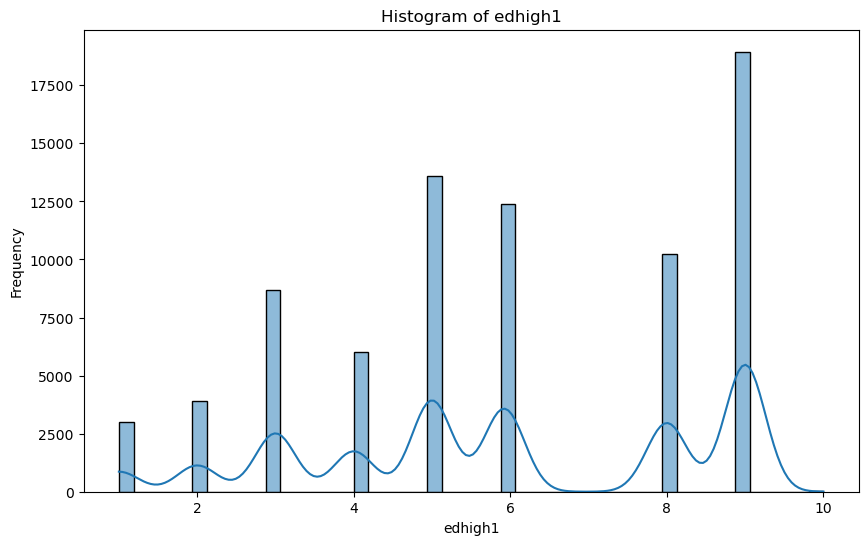

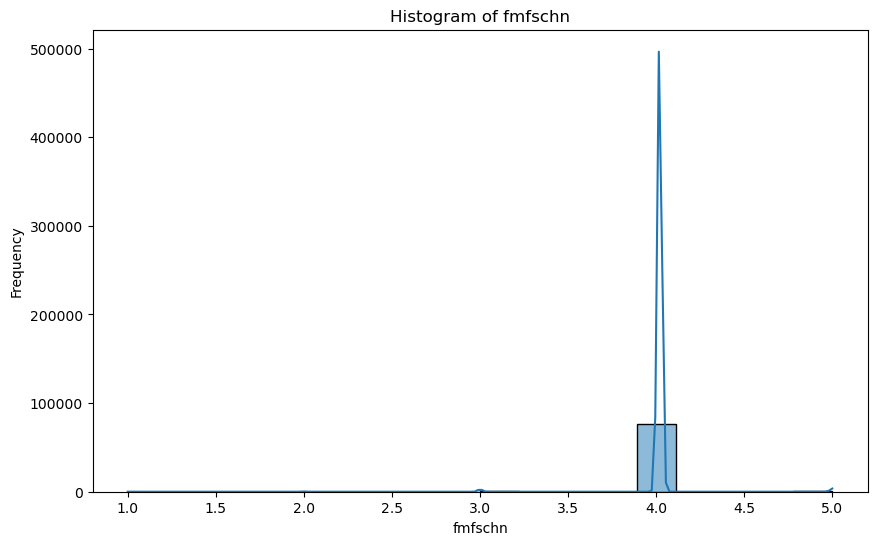

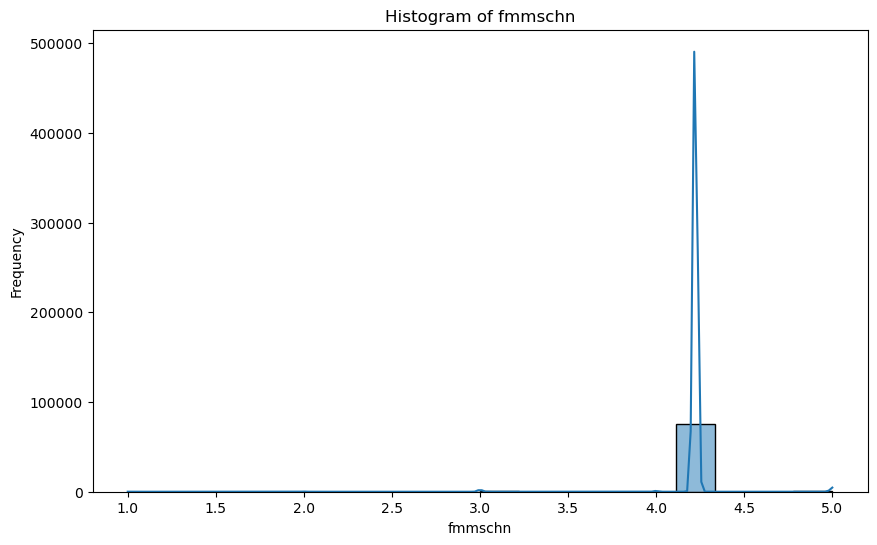

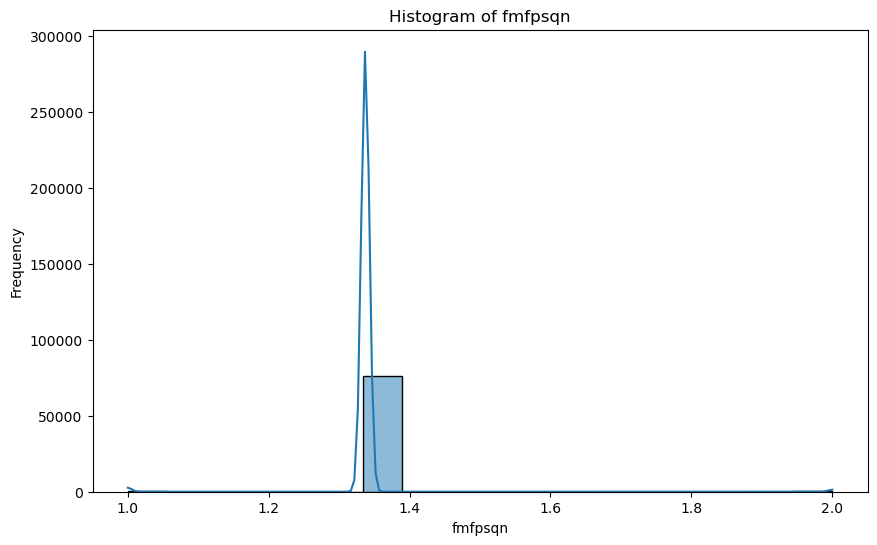

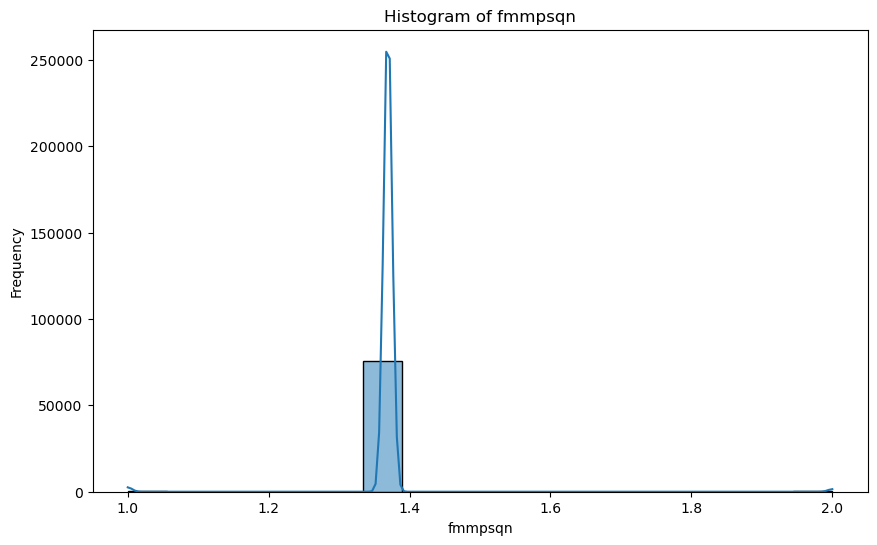

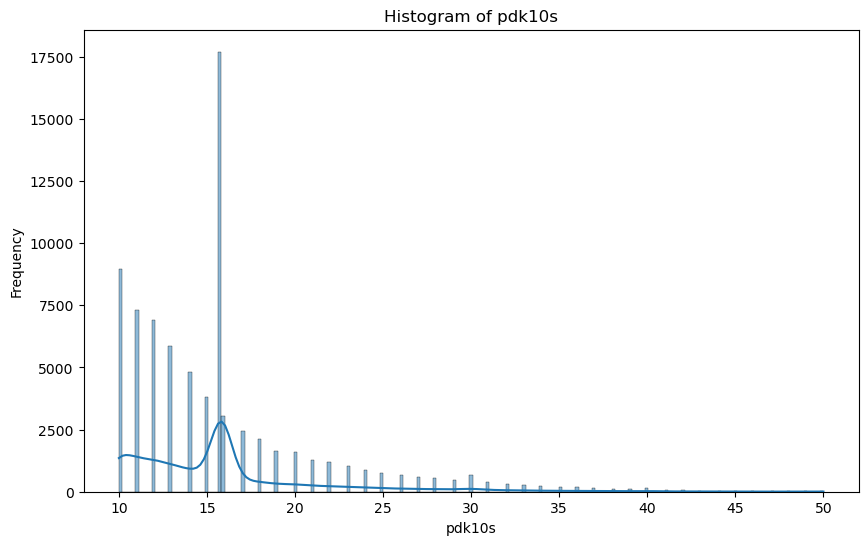

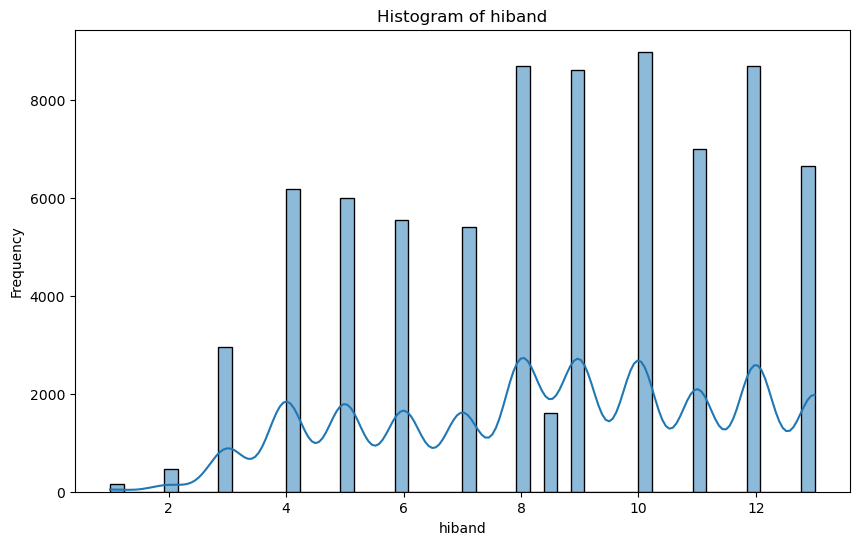

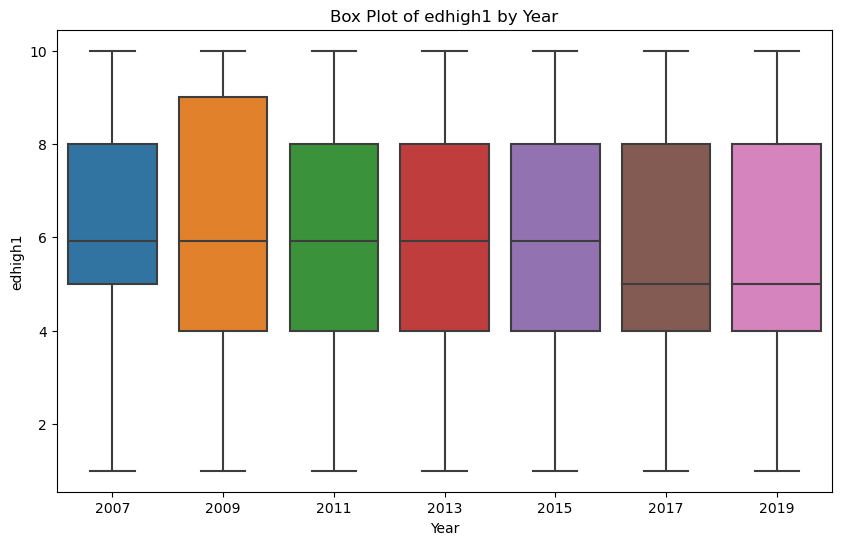

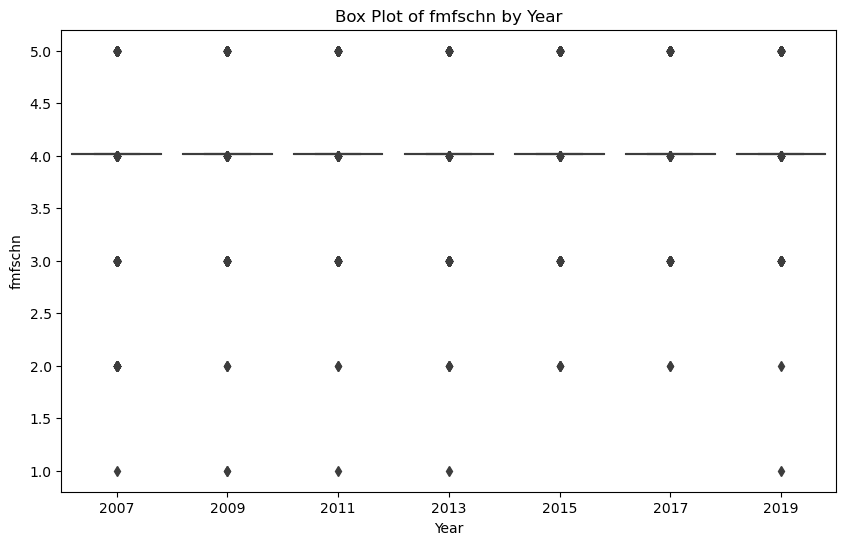

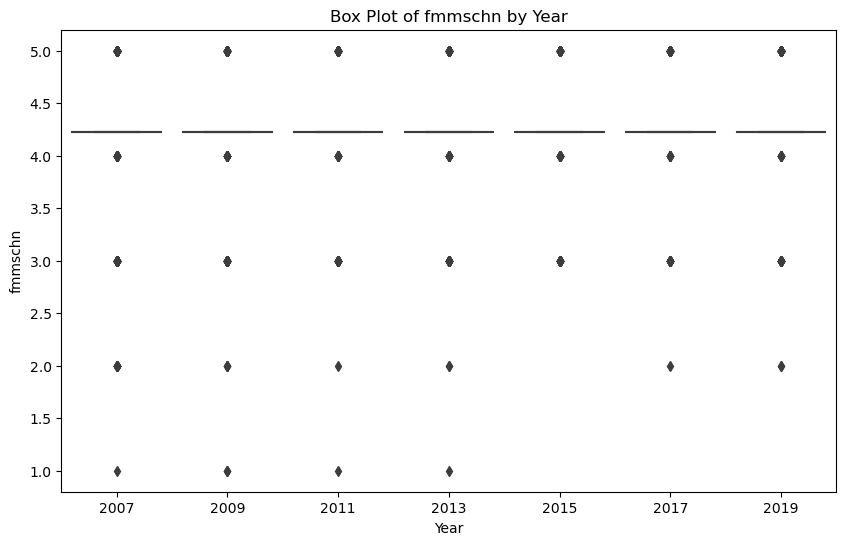

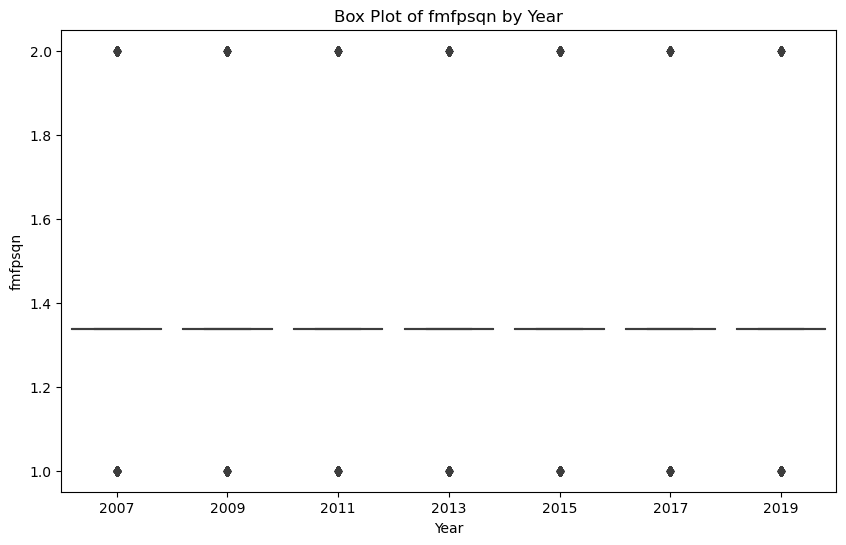

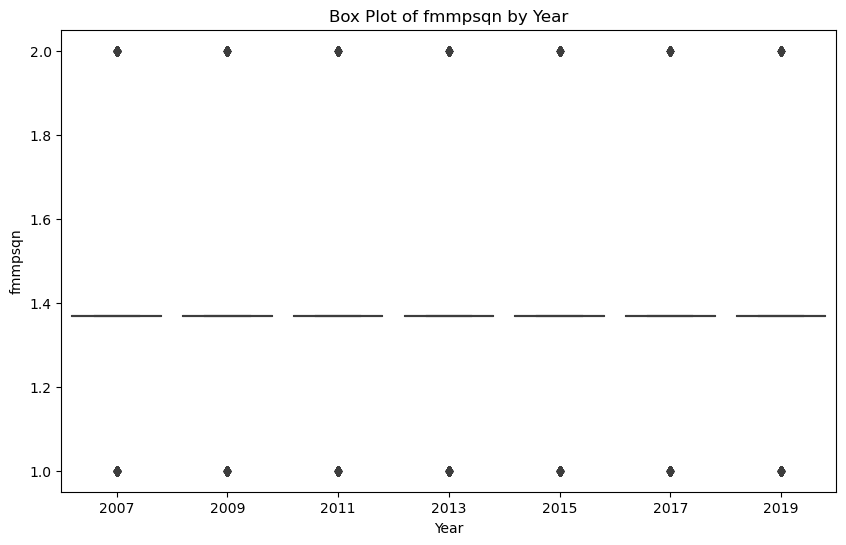

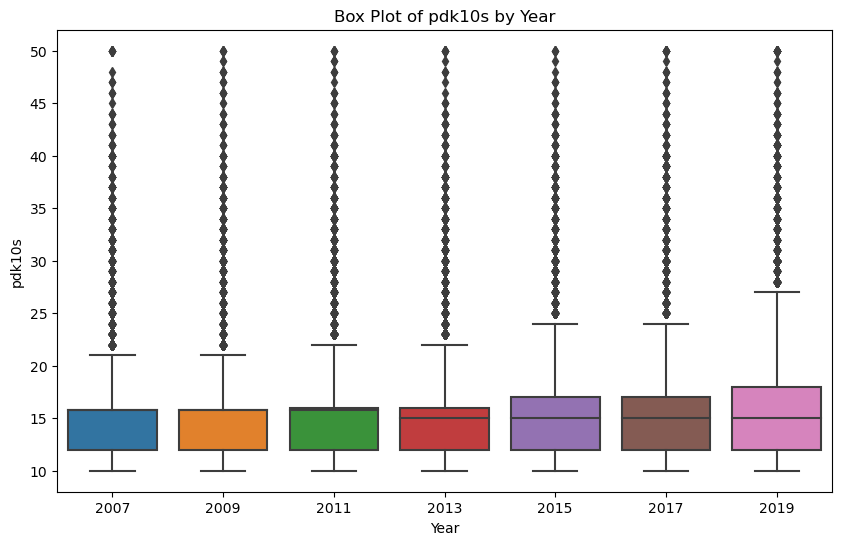

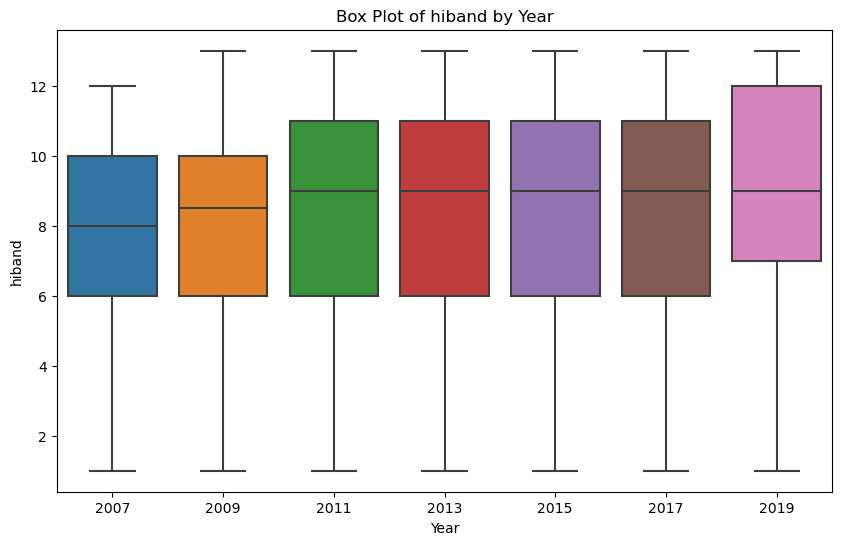

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of key variables
key_variables = ['edhigh1', 'fmfschn', 'fmmschn', 'fmfpsqn', 'fmmpsqn', 'pdk10s', 'hiband']

# Histograms
for var in key_variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_sorted[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Box plots
for var in key_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y=var, data=df_sorted)
    plt.title(f'Box Plot of {var} by Year')
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.show()


In [8]:
# # Fill NA values with the mean for df
# imputer = SimpleImputer(strategy='mean')
# df[numerical_columns + ['hiband']] = imputer.fit_transform(df[numerical_columns + ['hiband']])

# # Filter for xwaveid present in all 7 years
# df_filtered = df[df['xwaveid'].isin(df['xwaveid'].value_counts()[df['xwaveid'].value_counts() == 7].index)]


In [9]:
# Sort by xwaveid and year
df_sorted = df.sort_values(by=['xwaveid', 'year']).reset_index(drop=True)
df_sorted

,edhigh1,fmfschn,fmmschn,fmfpsqn,fmmpsqn,pdk10s,xwaveid,year,hiband
0,9.0,NaN,NaN,NaN,NaN,14.0,100003,2007,4.0
1,9.0,NaN,NaN,NaN,NaN,14.0,100003,2009,5.0
2,9.0,NaN,NaN,NaN,NaN,12.0,100003,2011,4.0
3,9.0,NaN,NaN,NaN,NaN,NaN,100003,2013,4.0
4,9.0,NaN,NaN,NaN,NaN,14.0,100003,2015,4.0
...,...,...,...,...,...,...,...,...,...
76841,1.0,NaN,NaN,NaN,NaN,13.0,700861,2011,9.0
76842,1.0,NaN,NaN,NaN,NaN,14.0,700861,2013,10.0
76843,1.0,NaN,NaN,NaN,NaN,13.0,700861,2015,11.0
76844,1.0,NaN,NaN,NaN,NaN,15.0,700861,2017,12.0


In [10]:
# # Standardize numerical features
# scaler = StandardScaler()
# df_sorted[numerical_columns + ['hiband']] = scaler.fit_transform(df_sorted[numerical_columns + ['hiband']])


In [11]:
df_sorted

,edhigh1,fmfschn,fmmschn,fmfpsqn,fmmpsqn,pdk10s,xwaveid,year,hiband
0,9.0,NaN,NaN,NaN,NaN,14.0,100003,2007,4.0
1,9.0,NaN,NaN,NaN,NaN,14.0,100003,2009,5.0
2,9.0,NaN,NaN,NaN,NaN,12.0,100003,2011,4.0
3,9.0,NaN,NaN,NaN,NaN,NaN,100003,2013,4.0
4,9.0,NaN,NaN,NaN,NaN,14.0,100003,2015,4.0
...,...,...,...,...,...,...,...,...,...
76841,1.0,NaN,NaN,NaN,NaN,13.0,700861,2011,9.0
76842,1.0,NaN,NaN,NaN,NaN,14.0,700861,2013,10.0
76843,1.0,NaN,NaN,NaN,NaN,13.0,700861,2015,11.0
76844,1.0,NaN,NaN,NaN,NaN,15.0,700861,2017,12.0


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Define the numerical columns
numerical_columns = ['edhigh1', 'fmfschn', 'fmmschn', 'fmfpsqn', 'fmmpsqn', 'pdk10s', 'hiband']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using MinMaxScaler
df_sorted[numerical_columns] = scaler.fit_transform(df_sorted[numerical_columns])

# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data using SimpleImputer
df_sorted[numerical_columns] = imputer.fit_transform(df_sorted[numerical_columns])

df_sorted


,edhigh1,fmfschn,fmmschn,fmfpsqn,fmmpsqn,pdk10s,xwaveid,year,hiband
0,0.888889,0.754866,0.805359,0.337198,0.369231,0.100000,100003,2007,0.250000
1,0.888889,0.754866,0.805359,0.337198,0.369231,0.100000,100003,2009,0.333333
2,0.888889,0.754866,0.805359,0.337198,0.369231,0.050000,100003,2011,0.250000
3,0.888889,0.754866,0.805359,0.337198,0.369231,0.145489,100003,2013,0.250000
4,0.888889,0.754866,0.805359,0.337198,0.369231,0.100000,100003,2015,0.250000
...,...,...,...,...,...,...,...,...,...
76841,0.000000,0.754866,0.805359,0.337198,0.369231,0.075000,700861,2011,0.666667
76842,0.000000,0.754866,0.805359,0.337198,0.369231,0.100000,700861,2013,0.750000
76843,0.000000,0.754866,0.805359,0.337198,0.369231,0.075000,700861,2015,0.833333
76844,0.000000,0.754866,0.805359,0.337198,0.369231,0.125000,700861,2017,0.916667


In [13]:
df_sorted

,edhigh1,fmfschn,fmmschn,fmfpsqn,fmmpsqn,pdk10s,xwaveid,year,hiband
0,0.888889,0.754866,0.805359,0.337198,0.369231,0.100000,100003,2007,0.250000
1,0.888889,0.754866,0.805359,0.337198,0.369231,0.100000,100003,2009,0.333333
2,0.888889,0.754866,0.805359,0.337198,0.369231,0.050000,100003,2011,0.250000
3,0.888889,0.754866,0.805359,0.337198,0.369231,0.145489,100003,2013,0.250000
4,0.888889,0.754866,0.805359,0.337198,0.369231,0.100000,100003,2015,0.250000
...,...,...,...,...,...,...,...,...,...
76841,0.000000,0.754866,0.805359,0.337198,0.369231,0.075000,700861,2011,0.666667
76842,0.000000,0.754866,0.805359,0.337198,0.369231,0.100000,700861,2013,0.750000
76843,0.000000,0.754866,0.805359,0.337198,0.369231,0.075000,700861,2015,0.833333
76844,0.000000,0.754866,0.805359,0.337198,0.369231,0.125000,700861,2017,0.916667


    Year   Model       MAE      RMSE            R²
0   2007  Linear  0.077926  0.122373  2.266269e-02
1   2007   Ridge  0.077919  0.122370  2.270169e-02
2   2007   Lasso  0.076716  0.123783 -2.811099e-07
3   2009  Linear  0.081504  0.125325  2.108780e-02
4   2009   Ridge  0.081498  0.125330  2.101753e-02
5   2009   Lasso  0.081107  0.126684 -2.606047e-04
6   2011  Linear  0.087969  0.131201  2.558233e-02
7   2011   Ridge  0.087964  0.131203  2.555379e-02
8   2011   Lasso  0.087238  0.132912 -5.658259e-06
9   2013  Linear  0.091745  0.138367  2.049175e-02
10  2013   Ridge  0.091740  0.138374  2.040237e-02
11  2013   Lasso  0.091097  0.139832 -3.510591e-04
12  2015  Linear  0.096962  0.143121  1.810169e-02
13  2015   Ridge  0.096961  0.143125  1.804634e-02
14  2015   Lasso  0.095683  0.144435 -1.374136e-05
15  2017  Linear  0.107152  0.150667  1.939260e-02
16  2017   Ridge  0.107130  0.150646  1.966804e-02
17  2017   Lasso  0.107251  0.152166 -2.229708e-04
18  2019  Linear  0.116974  0.1

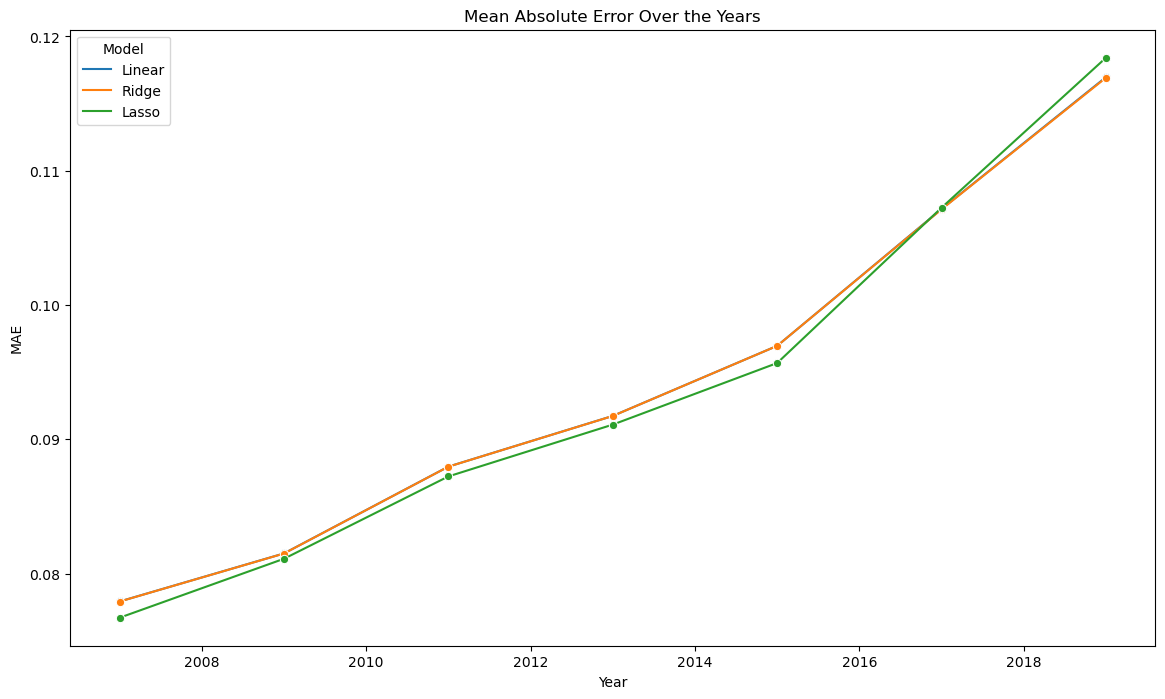

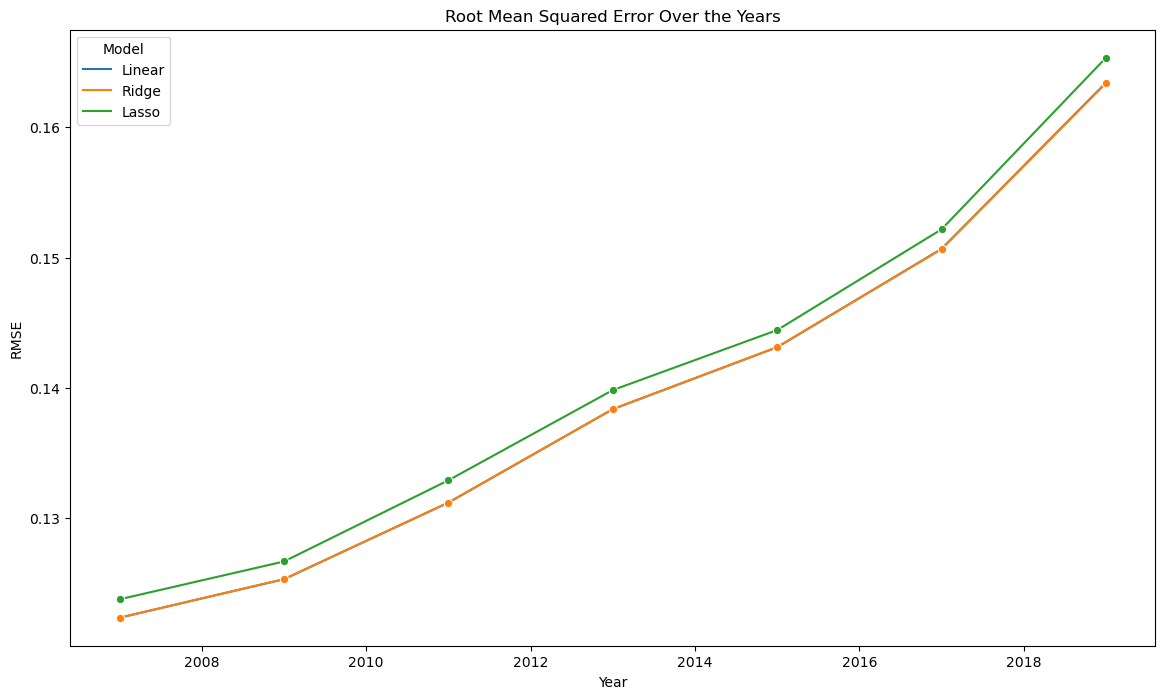

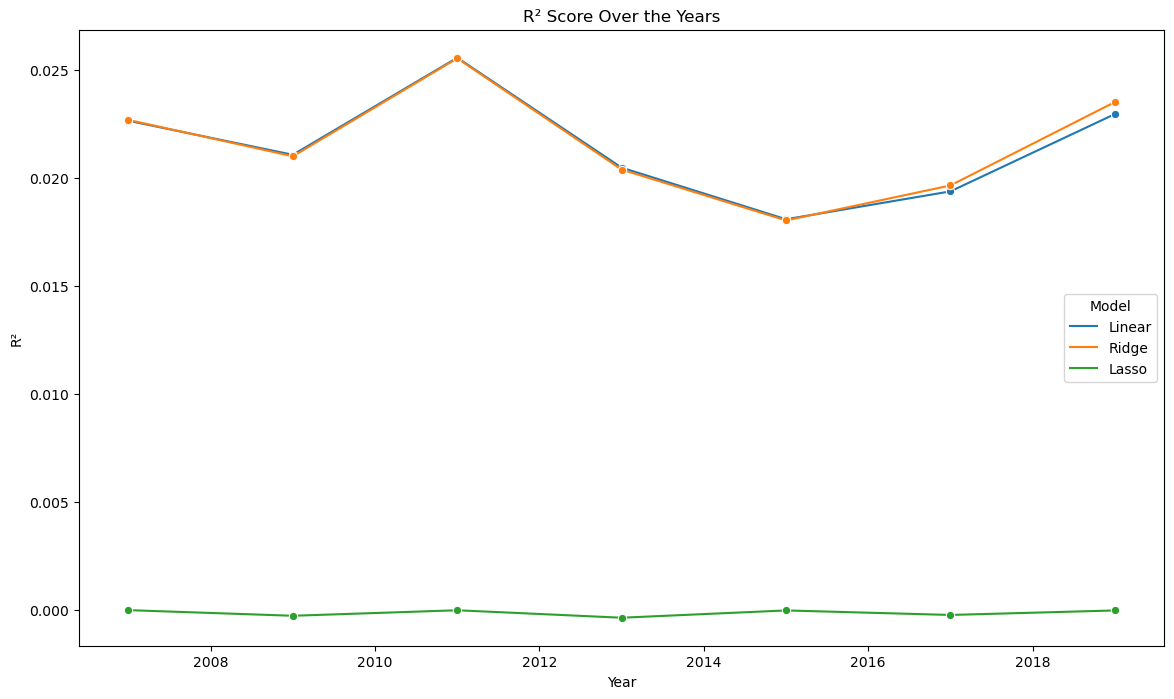

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your preprocessed DataFrame

# Define the target and feature columns
target = 'pdk10s'
features = ['edhigh1', 'fmfschn', 'fmmschn', 'fmfpsqn', 'fmmpsqn', 'hiband']

# Initialize dictionaries to store results
results = {
    'Year': [],
    'Model': [],
    'MAE': [],
    'RMSE': [],
    'R²': []
}

# Loop through each year and perform regression analysis
for year in df['year'].unique():
    df_year = df_sorted[df_sorted['year'] == year]
    
    X = df_year[features]
    y = df_year[target]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    results['Year'].append(year)
    results['Model'].append('Linear')
    results['MAE'].append(mean_absolute_error(y_test, y_pred_lr))
    results['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
    results['R²'].append(r2_score(y_test, y_pred_lr))
    
    # Ridge Regression
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    results['Year'].append(year)
    results['Model'].append('Ridge')
    results['MAE'].append(mean_absolute_error(y_test, y_pred_ridge))
    results['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    results['R²'].append(r2_score(y_test, y_pred_ridge))
    
    # Lasso Regression
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    results['Year'].append(year)
    results['Model'].append('Lasso')
    results['MAE'].append(mean_absolute_error(y_test, y_pred_lasso))
    results['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
    results['R²'].append(r2_score(y_test, y_pred_lasso))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print(results_df)

# Plot the performance metrics
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Year', y='MAE', hue='Model', marker='o')
plt.title('Mean Absolute Error Over the Years')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Year', y='RMSE', hue='Model', marker='o')
plt.title('Root Mean Squared Error Over the Years')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Year', y='R²', hue='Model', marker='o')
plt.title('R² Score Over the Years')
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.impute import SimpleImputer

# Function to get feature importances
def get_feature_importances(model, X_train, y_train, feature_names):
    model.fit(X_train, y_train)
    return pd.Series(np.abs(model.coef_), index=feature_names).sort_values(ascending=False)

# Function to evaluate the model and get feature importances
def evaluate_and_get_importances(model, X_train, y_train, feature_names):
    model.fit(X_train, y_train)
    importances = get_feature_importances(model, X_train, y_train, feature_names)
    return importances

# List to store the results
feature_importances = []

# Year-wise analysis
for year in sorted(df_sorted['year'].unique()):
    df_year = df_sorted[df_sorted['year'] == year]
    X = df_year.drop(columns=['pdk10s', 'year', 'xwaveid'])
    y = df_year['pdk10s']
    feature_names = X.columns
    
    # Fill missing values with mean
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Lasso model
    lasso = Lasso(alpha=0.1)
    lasso_importances = evaluate_and_get_importances(lasso, X_scaled, y, feature_names)
    top5_lasso = lasso_importances.head(5)
    
    # Ridge model
    ridge = Ridge(alpha=1.0)
    ridge_importances = evaluate_and_get_importances(ridge, X_scaled, y, feature_names)
    top5_ridge = ridge_importances.head(5)
    
    # Linear Regression model
    linear_reg = LinearRegression()
    linear_importances = evaluate_and_get_importances(linear_reg, X_scaled, y, feature_names)
    top5_linear = linear_importances.head(5)
    
    # Append results
    feature_importances.append({
        'Year': year,
        'Model': 'Lasso',
        'Top 5 Features': top5_lasso.index.tolist(),
        'Importances': top5_lasso.values.tolist()
    })
    feature_importances.append({
        'Year': year,
        'Model': 'Ridge',
        'Top 5 Features': top5_ridge.index.tolist(),
        'Importances': top5_ridge.values.tolist()
    })
    feature_importances.append({
        'Year': year,
        'Model': 'Linear Regression',
        'Top 5 Features': top5_linear.index.tolist(),
        'Importances': top5_linear.values.tolist()
    })

# Convert the results to a DataFrame
feature_importances_df = pd.DataFrame(feature_importances)

# Display the top 5 feature importances for each model and year
print(feature_importances_df)

# Optional: Save to CSV for further analysis
# feature_importances_df.to_csv('feature_importances.csv', index=False)


    Year              Model                                 Top 5 Features  \
0   2007              Lasso  [edhigh1, fmfschn, fmmschn, fmfpsqn, fmmpsqn]   
1   2007              Ridge   [hiband, edhigh1, fmmpsqn, fmfschn, fmmschn]   
2   2007  Linear Regression   [hiband, edhigh1, fmmpsqn, fmfschn, fmmschn]   
3   2009              Lasso  [edhigh1, fmfschn, fmmschn, fmfpsqn, fmmpsqn]   
4   2009              Ridge   [hiband, edhigh1, fmfschn, fmmschn, fmfpsqn]   
5   2009  Linear Regression   [hiband, edhigh1, fmfschn, fmmschn, fmfpsqn]   
6   2011              Lasso  [edhigh1, fmfschn, fmmschn, fmfpsqn, fmmpsqn]   
7   2011              Ridge   [hiband, edhigh1, fmmpsqn, fmmschn, fmfpsqn]   
8   2011  Linear Regression   [hiband, edhigh1, fmmpsqn, fmmschn, fmfpsqn]   
9   2013              Lasso  [edhigh1, fmfschn, fmmschn, fmfpsqn, fmmpsqn]   
10  2013              Ridge   [hiband, edhigh1, fmmschn, fmfschn, fmmpsqn]   
11  2013  Linear Regression   [hiband, edhigh1, fmmschn, fmfschn

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.impute import SimpleImputer

# Function to get feature importances
def get_feature_importances(model, X_train, y_train, feature_names):
    model.fit(X_train, y_train)
    return pd.Series(np.abs(model.coef_), index=feature_names).sort_values(ascending=False)

# Function to evaluate the model and get feature importances
def evaluate_and_get_importances(model, X_train, y_train, feature_names):
    model.fit(X_train, y_train)
    importances = get_feature_importances(model, X_train, y_train, feature_names)
    return importances

# List to store the results
feature_importances = []

# Year-wise analysis
for year in sorted(df_sorted['year'].unique()):
    df_year = df_sorted[df_sorted['year'] == year]
    X = df_year.drop(columns=['pdk10s', 'year', 'xwaveid'])
    y = df_year['pdk10s']
    feature_names = X.columns
    
    # Fill missing values with mean
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Lasso model
    lasso = Lasso(alpha=0.1)
    lasso_importances = evaluate_and_get_importances(lasso, X_scaled, y, feature_names)
    top5_lasso = lasso_importances.head(5)
    
    # Ridge model
    ridge = Ridge(alpha=1.0)
    ridge_importances = evaluate_and_get_importances(ridge, X_scaled, y, feature_names)
    top5_ridge = ridge_importances.head(5)
    
    # Linear Regression model
    linear_reg = LinearRegression()
    linear_importances = evaluate_and_get_importances(linear_reg, X_scaled, y, feature_names)
    top5_linear = linear_importances.head(5)
    
    # Append results
    feature_importances.append({
        'Year': year,
        'Model': 'Lasso',
        'Top 5 Features': top5_lasso.index.tolist(),
        'Importances': top5_lasso.values.tolist()
    })
    feature_importances.append({
        'Year': year,
        'Model': 'Ridge',
        'Top 5 Features': top5_ridge.index.tolist(),
        'Importances': top5_ridge.values.tolist()
    })
    feature_importances.append({
        'Year': year,
        'Model': 'Linear Regression',
        'Top 5 Features': top5_linear.index.tolist(),
        'Importances': top5_linear.values.tolist()
    })

# Convert the results to a DataFrame
feature_importances_df = pd.DataFrame(feature_importances)

# Calculate the count of each feature across all years and models
feature_counts = feature_importances_df.explode('Top 5 Features')['Top 5 Features'].value_counts()

# Display the top 5 feature importances for each model and year
print(feature_importances_df)

# Display the feature counts
print("\nFeature Counts Across All Years and Models:")
print(feature_counts)

# Optional: Save to CSV for further analysis
# feature_importances_df.to_csv('feature_importances.csv', index=False)
# feature_counts.to_csv('feature_counts.csv', index=False)


    Year              Model                                 Top 5 Features  \
0   2007              Lasso  [edhigh1, fmfschn, fmmschn, fmfpsqn, fmmpsqn]   
1   2007              Ridge   [hiband, edhigh1, fmmpsqn, fmfschn, fmmschn]   
2   2007  Linear Regression   [hiband, edhigh1, fmmpsqn, fmfschn, fmmschn]   
3   2009              Lasso  [edhigh1, fmfschn, fmmschn, fmfpsqn, fmmpsqn]   
4   2009              Ridge   [hiband, edhigh1, fmfschn, fmmschn, fmfpsqn]   
5   2009  Linear Regression   [hiband, edhigh1, fmfschn, fmmschn, fmfpsqn]   
6   2011              Lasso  [edhigh1, fmfschn, fmmschn, fmfpsqn, fmmpsqn]   
7   2011              Ridge   [hiband, edhigh1, fmmpsqn, fmmschn, fmfpsqn]   
8   2011  Linear Regression   [hiband, edhigh1, fmmpsqn, fmmschn, fmfpsqn]   
9   2013              Lasso  [edhigh1, fmfschn, fmmschn, fmfpsqn, fmmpsqn]   
10  2013              Ridge   [hiband, edhigh1, fmmschn, fmfschn, fmmpsqn]   
11  2013  Linear Regression   [hiband, edhigh1, fmmschn, fmfschn

   Year          Model       MAE      RMSE        R²
0  2007  Random Forest  0.074649  0.122172  0.025862
1  2009  Random Forest  0.078859  0.125678  0.015559
2  2011  Random Forest  0.085020  0.131150  0.026329
3  2013  Random Forest  0.091115  0.140190 -0.005488
4  2015  Random Forest  0.095853  0.143813  0.008589
5  2017  Random Forest  0.107184  0.151369  0.010234
6  2019  Random Forest  0.116470  0.163455  0.022526


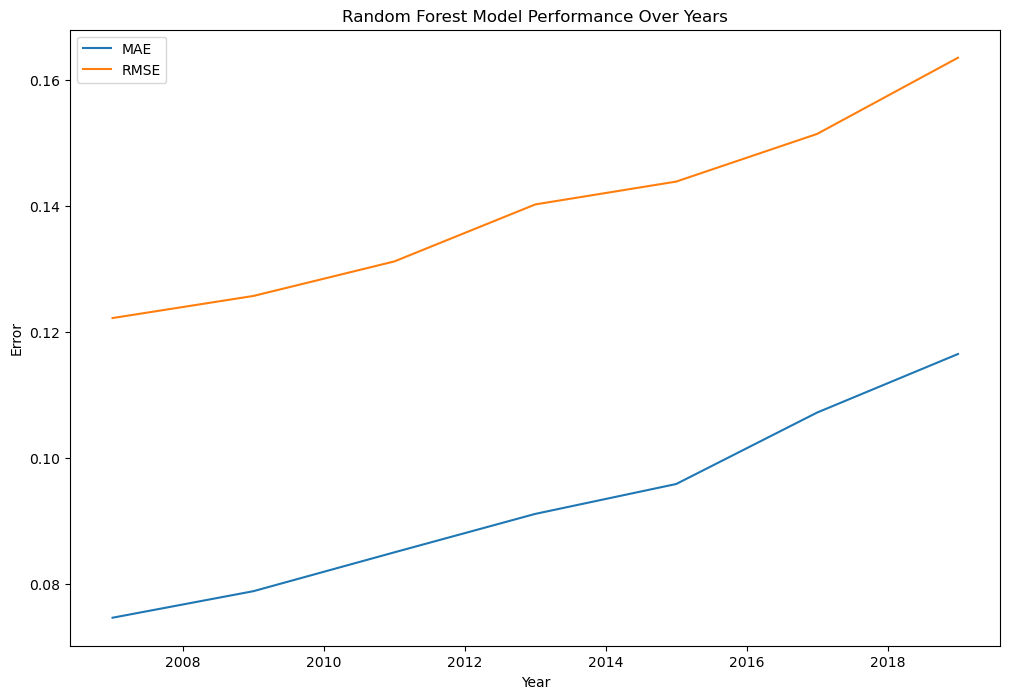

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df_sorted is already defined and available
# df_sorted should be the DataFrame sorted by xwaveid and year, and with missing values handled.

# Initialize results list
results = []

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Year-wise analysis
for year in sorted(df_sorted['year'].unique()):
    df_year = df_sorted[df_sorted['year'] == year]
    X = df_year.drop(columns=['pdk10s', 'year', 'xwaveid'])
    y = df_year['pdk10s']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Evaluate the model
    mae, rmse, r2 = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
    
    # Append the results
    results.append([year, 'Random Forest', mae, rmse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Year', 'Model', 'MAE', 'RMSE', 'R²'])

# Display the results
print(results_df)

# Plot the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.lineplot(data=results_df, x='Year', y='MAE', label='MAE')
sns.lineplot(data=results_df, x='Year', y='RMSE', label='RMSE')
plt.title('Random Forest Model Performance Over Years')
plt.xlabel('Year')
plt.ylabel('Error')
plt.legend()
plt.show()


In [18]:
import pandas as pd

# Assuming df_sorted is the DataFrame with standardized values and no missing values

# Calculate the Pearson correlation matrix
correlation_matrix = df_sorted.corr()

# Extract the correlation values for the target variable 'pdk10s'
pdk10s_correlation = correlation_matrix['pdk10s'].sort_values(ascending=False)

# Display the correlation values
print(pdk10s_correlation)


pdk10s     1.000000
edhigh1    0.100033
year       0.051511
fmfschn    0.008634
xwaveid    0.001230
fmmschn   -0.000322
fmfpsqn   -0.004833
fmmpsqn   -0.010763
hiband    -0.115512
Name: pdk10s, dtype: float64


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# List to store the results
results = []

# Year-wise analysis
for year in sorted(df_sorted['year'].unique()):
    df_year = df_sorted[df_sorted['year'] == year]
    X = df_year.drop(columns=['pdk10s', 'year', 'xwaveid'])
    y = df_year['pdk10s']
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression model
    linear_reg = LinearRegression()
    mae, rmse, r2 = evaluate_model(linear_reg, X_train, y_train, X_test, y_test)
    
    # Append the results
    results.append([year, 'Linear Regression', mae, rmse, r2])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Year', 'Model', 'MAE', 'RMSE', 'R²'])

# Display the results
print(results_df)

# Optional: Save the results to a CSV file
# results_df.to_csv('linear_regression_results.csv', index=False)


   Year              Model       MAE      RMSE        R²
0  2007  Linear Regression  0.077926  0.122373  0.022663
1  2009  Linear Regression  0.081504  0.125325  0.021088
2  2011  Linear Regression  0.087969  0.131201  0.025582
3  2013  Linear Regression  0.091745  0.138367  0.020492
4  2015  Linear Regression  0.096962  0.143121  0.018102
5  2017  Linear Regression  0.107152  0.150667  0.019393
6  2019  Linear Regression  0.116974  0.163418  0.022972


In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Ensure your DataFrame is sorted by xwaveid and year
df_sorted = df_sorted.sort_values(by=['xwaveid', 'year'])

# Define the mixed-effects model formula
# 'pdk10s ~ year + edhigh1 + fmfschn + fmmschn + fmfpsqn + fmmpsqn + hiband'
# You can include interaction terms or higher-order terms if needed
formula = 'pdk10s ~ year + edhigh1 + fmfschn + fmmschn + fmfpsqn + fmmpsqn + hiband'

# Fit the mixed-effects model
model = mixedlm(formula, df_sorted, groups=df_sorted['xwaveid'])
result = model.fit()

# Print the summary of the model
print(result.summary())



         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pdk10s    
No. Observations: 76846   Method:             REML      
No. Groups:       10978   Scale:              0.0093    
Min. group size:  7       Log-Likelihood:     58622.0602
Max. group size:  7       Converged:          Yes       
Mean group size:  7.0                                   
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -4.197    0.179 -23.461 0.000 -4.547 -3.846
year          0.002    0.000  24.332 0.000  0.002  0.002
edhigh1       0.043    0.003  16.255 0.000  0.038  0.048
fmfschn       0.046    0.014   3.307 0.001  0.019  0.073
fmmschn      -0.043    0.014  -2.975 0.003 -0.071 -0.015
fmfpsqn      -0.002    0.007  -0.243 0.808 -0.016  0.013
fmmpsqn      -0.026    0.007  -3.700 0.000 -0.040 -0.012
hiband       -0.032    0.002 -13.637 0.00

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pdk10s    
No. Observations: 76846   Method:             REML      
No. Groups:       10978   Scale:              0.0093    
Min. group size:  7       Log-Likelihood:     58622.0602
Max. group size:  7       Converged:          Yes       
Mean group size:  7.0                                   
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -4.197    0.179 -23.461 0.000 -4.547 -3.846
year          0.002    0.000  24.332 0.000  0.002  0.002
edhigh1       0.043    0.003  16.255 0.000  0.038  0.048
fmfschn       0.046    0.014   3.307 0.001  0.019  0.073
fmmschn      -0.043    0.014  -2.975 0.003 -0.071 -0.015
fmfpsqn      -0.002    0.007  -0.243 0.808 -0.016  0.013
fmmpsqn      -0.026    0.007  -3.700 0.000 -0.040 -0.012
hiband       -0.032    0.002 -13.637 0.00

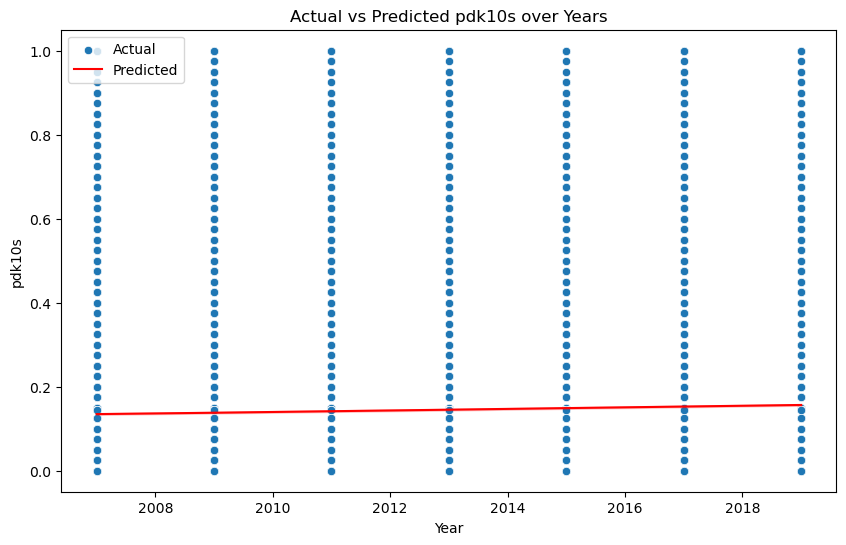

In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame is sorted by xwaveid and year
df_sorted = df_sorted.sort_values(by=['xwaveid', 'year'])

# Define the mixed-effects model formula
formula = 'pdk10s ~ year + edhigh1 + fmfschn + fmmschn + fmfpsqn + fmmpsqn + hiband'

# Fit the mixed-effects model
model = mixedlm(formula, df_sorted, groups=df_sorted['xwaveid'])
result = model.fit()

# Print the summary of the model
print(result.summary())

# Get the predicted values
df_sorted['predicted_pdk10s'] = result.fittedvalues

# Plot scatter plot with line of best fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='pdk10s', data=df_sorted, label='Actual')
sns.lineplot(x='year', y='predicted_pdk10s', data=df_sorted, color='red', label='Predicted')
plt.title('Actual vs Predicted pdk10s over Years')
plt.xlabel('Year')
plt.ylabel('pdk10s')
plt.legend()
plt.show()


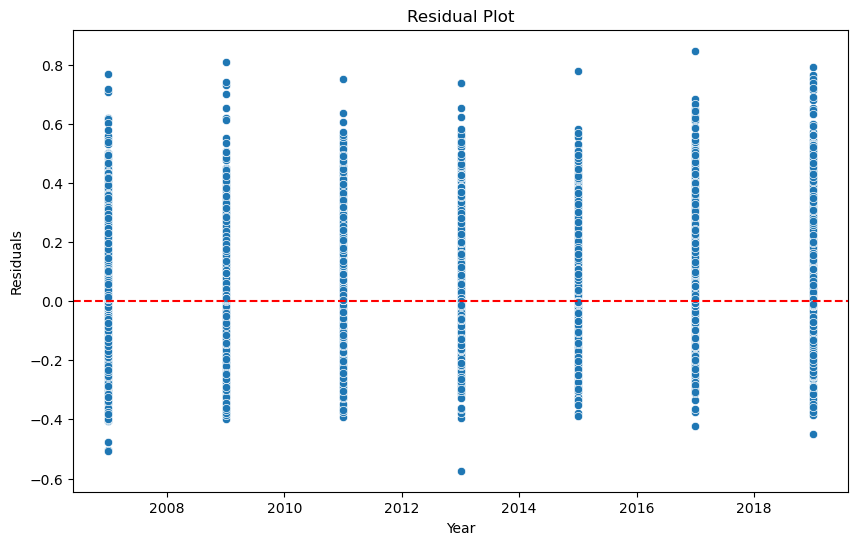

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
df_sorted['residuals'] = df_sorted['pdk10s'] - df_sorted['predicted_pdk10s']

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='residuals', data=df_sorted)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()


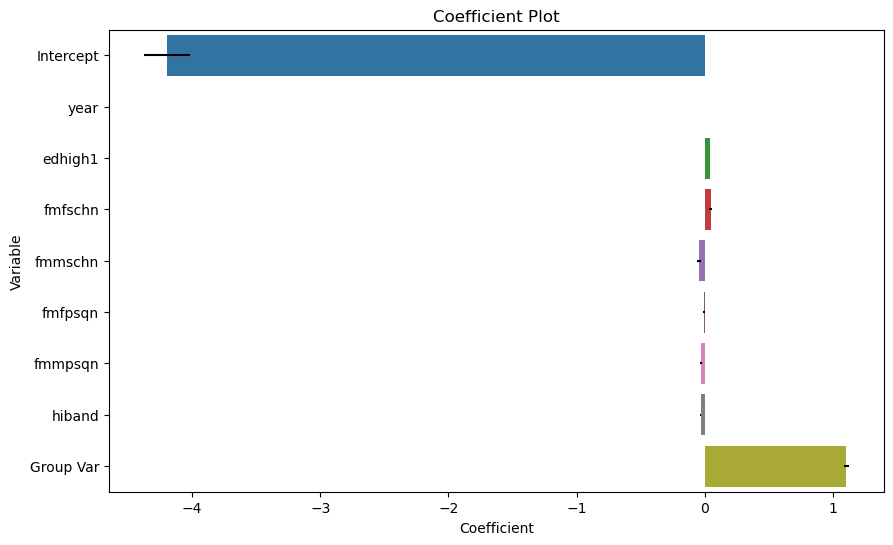

In [23]:
# Coefficient plot
coef_df = pd.DataFrame({
    'Variable': result.params.index,
    'Coefficient': result.params.values,
    'StdErr': result.bse.values
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df, xerr=coef_df['StdErr'])
plt.title('Coefficient Plot')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.show()


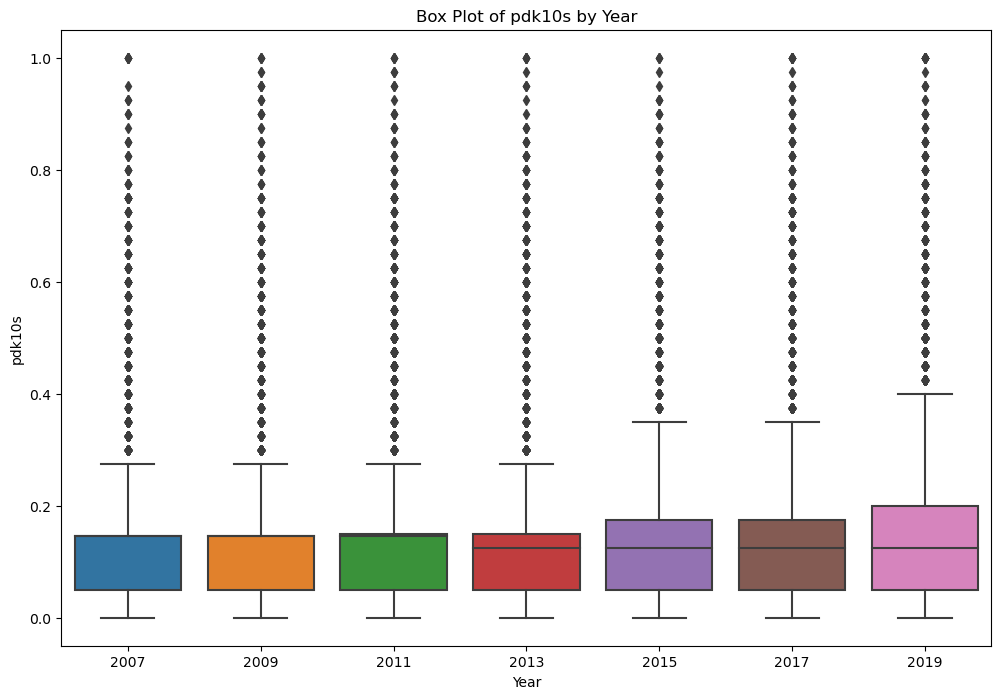

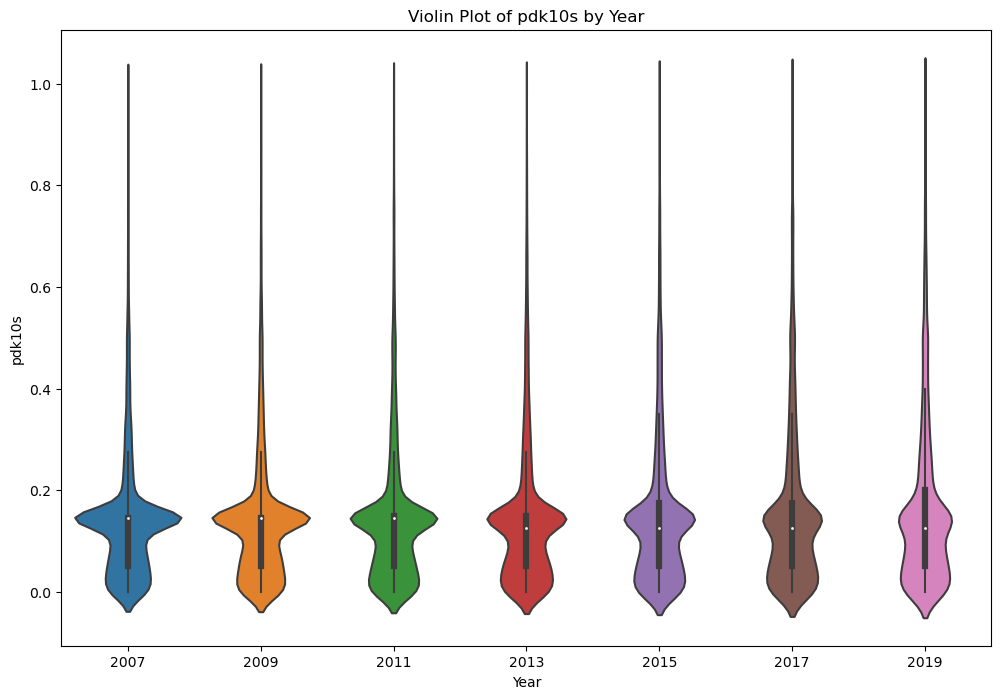

In [24]:
# Box plot for pdk10s by year
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='pdk10s', data=df_sorted)
plt.title('Box Plot of pdk10s by Year')
plt.xlabel('Year')
plt.ylabel('pdk10s')
plt.show()

# Violin plot for pdk10s by year
plt.figure(figsize=(12, 8))
sns.violinplot(x='year', y='pdk10s', data=df_sorted)
plt.title('Violin Plot of pdk10s by Year')
plt.xlabel('Year')
plt.ylabel('pdk10s')
plt.show()


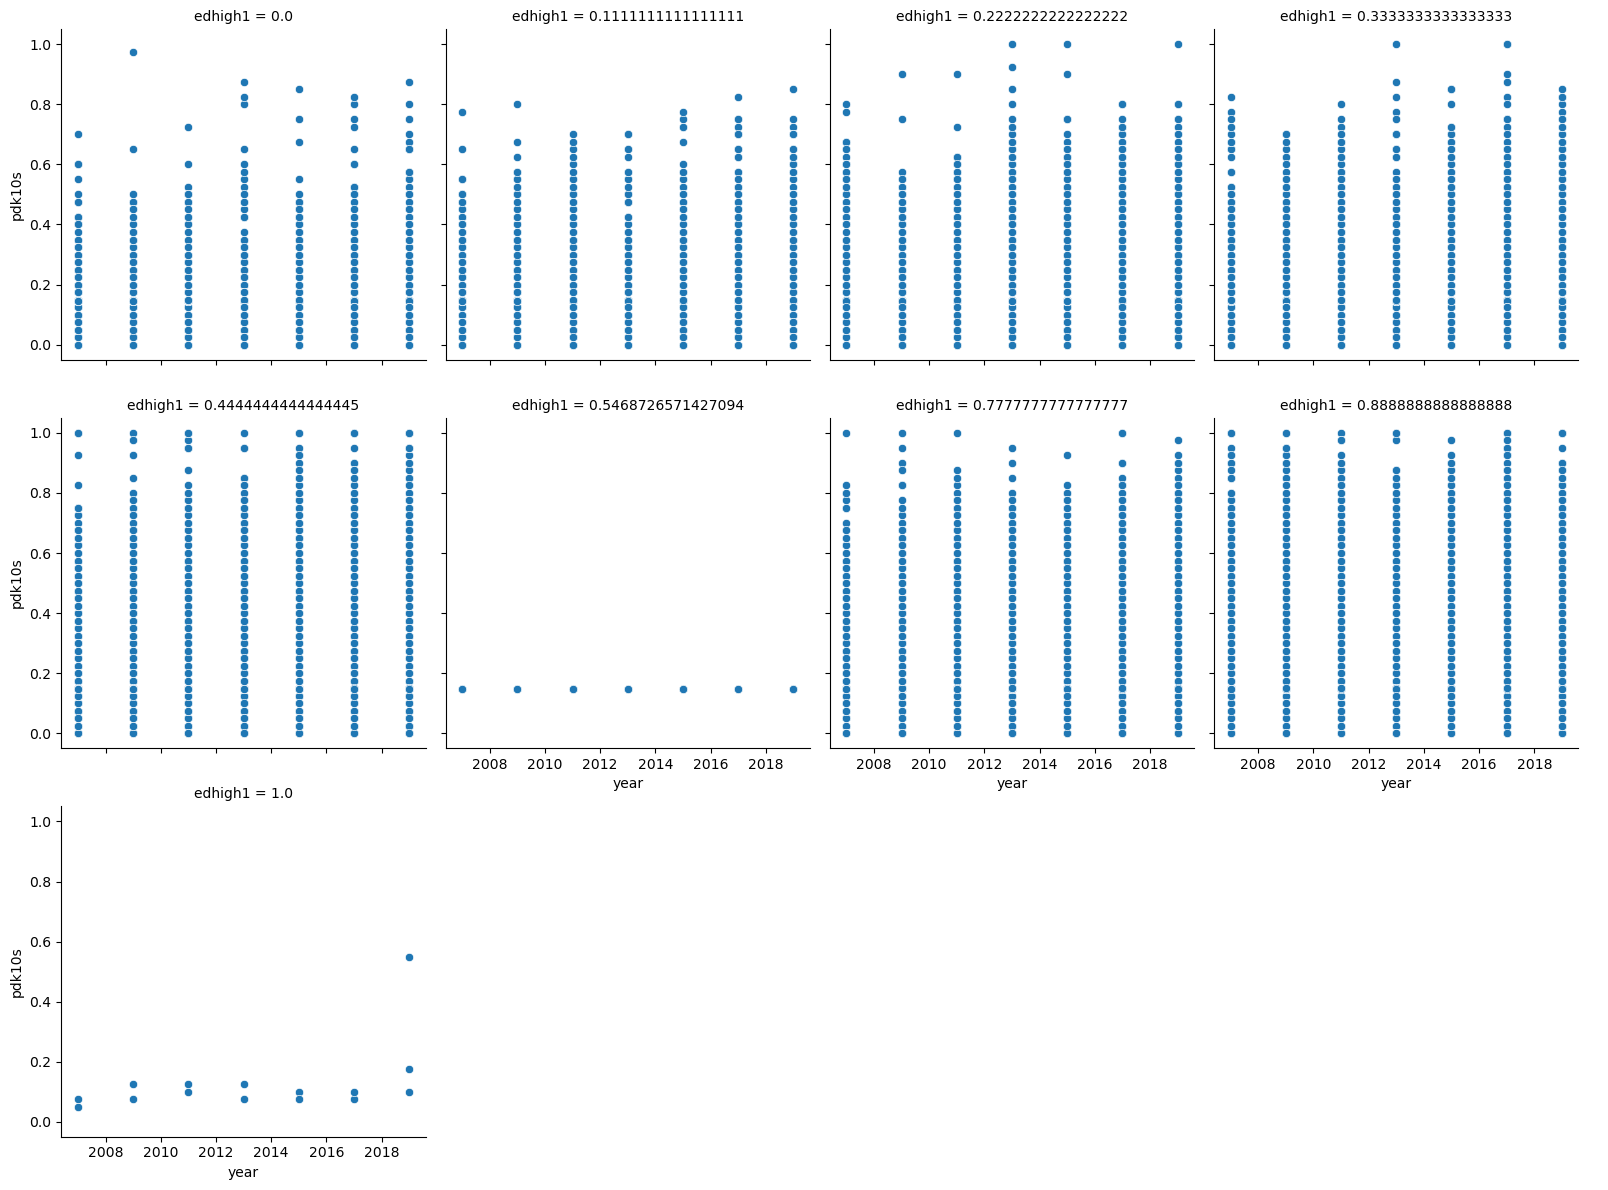

In [25]:
# Faceted plot for pdk10s by year and education level
g = sns.FacetGrid(df_sorted, col='edhigh1', col_wrap=4, height=4)
g.map(sns.scatterplot, 'year', 'pdk10s')
g.add_legend()
plt.show()
